In [1]:
# Reference : https://github.com/golbin/TensorFlow-Tutorials
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x12eeba3c8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x12eed9978>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x12eed9b70>)

# 옵션 설정

In [29]:
learning_rate = 0.01
training_epoch = 100
batch_size = 100

n_hidden = 30
n_input = 28*28

# 모델 구성

In [30]:
X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [31]:
cost = tf.reduce_mean(tf.pow(X-decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# 모델 학습

In [32]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch :', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.format(total_cost/ total_batch))

Epoch : 0001 Avg. cost =  0.1714
Epoch : 0002 Avg. cost =  0.0707
Epoch : 0003 Avg. cost =  0.0642
Epoch : 0004 Avg. cost =  0.0586
Epoch : 0005 Avg. cost =  0.0557
Epoch : 0006 Avg. cost =  0.0533
Epoch : 0007 Avg. cost =  0.0491
Epoch : 0008 Avg. cost =  0.0461
Epoch : 0009 Avg. cost =  0.0447
Epoch : 0010 Avg. cost =  0.0441
Epoch : 0011 Avg. cost =  0.0438
Epoch : 0012 Avg. cost =  0.0435
Epoch : 0013 Avg. cost =  0.0433
Epoch : 0014 Avg. cost =  0.0432
Epoch : 0015 Avg. cost =  0.0426
Epoch : 0016 Avg. cost =  0.0416
Epoch : 0017 Avg. cost =  0.0412
Epoch : 0018 Avg. cost =  0.0406
Epoch : 0019 Avg. cost =  0.0395
Epoch : 0020 Avg. cost =  0.0391
Epoch : 0021 Avg. cost =  0.0389
Epoch : 0022 Avg. cost =  0.0387
Epoch : 0023 Avg. cost =  0.0382
Epoch : 0024 Avg. cost =  0.0374
Epoch : 0025 Avg. cost =  0.0370
Epoch : 0026 Avg. cost =  0.0367
Epoch : 0027 Avg. cost =  0.0364
Epoch : 0028 Avg. cost =  0.0360
Epoch : 0029 Avg. cost =  0.0355
Epoch : 0030 Avg. cost =  0.0352
Epoch : 00

# 결과 확인

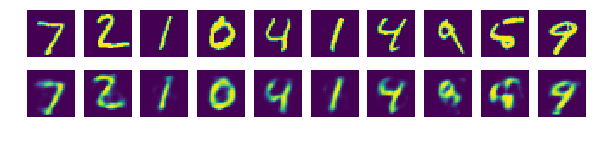

In [33]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

flg, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()